# Verlet Integration & Bezier Curves

In [1]:
import numpy as np
from matplotlib.pyplot import *
from jupyterthemes import jtplot
from IPython.display import set_matplotlib_formats

In [2]:
%matplotlib inline
set_matplotlib_formats('svg')
jtplot.style(theme='oceans16', context='notebook', ticks=True)
rcParams['figure.figsize'] = [8, 3]

We try and solve time-dependant acceleration problems using verlet integration, and using a bezier formulation to approximate the solution between physics time steps. The verlet method gives:

$
\begin{align}
x_{n+1} &= x_n + v_n\Delta t + \dfrac{1}{2}a_n{\Delta t}^2 \\
v_{n+1} &= v_n + \dfrac{1}{2}\left(a_n + a_{n+1}\right){\Delta t}
\end{align}
$

We replace $\Delta t$ with $h t_0$:

$
\begin{equation}
x_{n+1} = x_n + (v_n h)t_0 + \dfrac{1}{2}(a_n h^2){t_0}^2
\end{equation}
$

Then, given the bezier curve equation:

$
\begin{align}
B(t_0) &= (1-t_0)^2 b_0 + t_0 (1 - t_0) b_1 + {t_0}^2 b_2 \\
&= a_0 + a_1 t_0 + a_2 {t_0}^2,
\end{align}
$

We then use:

$
\begin{equation}
\begin{bmatrix} b_0\\b_1\\b_2 \end{bmatrix} =%
\begin{bmatrix} 1 & 0 & 0\\ 1 & \frac{1}{2} & 0\\ 1 & 1 & 1 \end{bmatrix} %
\begin{bmatrix} r_n\\v_n h\\ \frac{1}{2} a_n h^2 \end{bmatrix}
\end{equation}
$

which gives:

$
\begin{align}
b_0 &= x_n\\
b_1 &= x_n + \frac{1}{2} v_n h\\
b_2 &= x_n + v_n h + \frac{1}{2} a_n h^2
\end{align}
$

And we can use this to extract values in between time steps

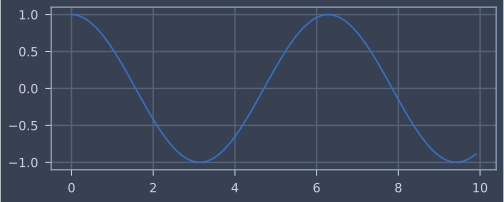

In [36]:
k = 1.0
m = 1.0
h = 0.1

num_steps = 100

x = 1.0
xs = []

v = 0.0
vs = []

t = 0.0
ts = []

for n in range(0, num_steps):
    xs.append(x)
    vs.append(v)
    ts.append(t)
    
    a_n = -k*x/m
    x = x + v*h + 0.5*a_n*(h**2)
    a_nn = -k*x/m
    v = v + 0.5*h*(a_n + a_nn)
    t = t + h

plot(ts, xs)

## Expanding Bezier to Verlet